# Exploratory Data Analysis on Malaysia's Population Dataset

## Introduction
This project explores Malaysian population trends using an official dataset. The data includes variables like year, age group, sex, ethnicity, and population count from 1970 onwards. The goal is to understand Malaysia's demographic shifts over time, identify patterns by age or gender, and visualize the main characteristics of the dataset using various EDA techniques.


**2. Import Libraries & Load Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the dataset
df = pd.read_csv('/content/population_malaysia.csv')

# Preview the dataset
df.head()


,date,sex,age,ethnicity,population
0,1970-01-01,both,overall,overall,10881.8
1,1970-01-01,both,0-4,overall,1702.4
2,1970-01-01,both,5-9,overall,1690.3
3,1970-01-01,both,10-14,overall,1454.7
4,1970-01-01,both,15-19,overall,1197.6


**3. Basic Exploration**

In [3]:
# Dimensions of the dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types and non-null counts
df.info()

# Summary statistics
df.describe(include='all')


Shape: (17415, 5)
Columns: ['date', 'sex', 'age', 'ethnicity', 'population']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17415 entries, 0 to 17414
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17415 non-null  object 
 1   sex         17415 non-null  object 
 2   age         17415 non-null  object 
 3   ethnicity   17415 non-null  object 
 4   population  17415 non-null  float64
dtypes: float64(1), object(4)
memory usage: 680.4+ KB


,date,sex,age,ethnicity,population
count,17415,17415,17415,17415,17415.000000
unique,56,3,21,9,NaN
top,1991-01-01,both,overall,overall,NaN
freq,399,5805,930,3069,NaN
mean,NaN,NaN,NaN,NaN,545.540718
std,NaN,NaN,NaN,NaN,1877.945600
min,NaN,NaN,NaN,NaN,0.200000
25%,NaN,NaN,NaN,NaN,24.400000
50%,NaN,NaN,NaN,NaN,111.900000
75%,NaN,NaN,NaN,NaN,394.050000


### Summary
- This dataset contains Malaysian population data grouped by `date`, `sex`, `age group`, and `ethnicity`.
- Column `population` is a float, and `date` needs to be converted into datetime.
- No categorical values are encoded yet.


**4. Data Cleaning & Preparation**

In [4]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check again
df.info()


Missing values:
 date          0
sex           0
age           0
ethnicity     0
population    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17415 entries, 0 to 17414
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17415 non-null  datetime64[ns]
 1   sex         17415 non-null  object        
 2   age         17415 non-null  object        
 3   ethnicity   17415 non-null  object        
 4   population  17415 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 680.4+ KB


### Cleaning Notes:
- The date is parsed into datetime format.
- No missing values were found.
- No duplicates exist.


**5. Univariate Analysis**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'both'),
  Text(1, 0, 'female'),
  Text(2, 0, 'male'),
  Text(3, 0, 'bumi'),
  Text(4, 0, 'bumi_malay'),
  Text(5, 0, 'bumi_other'),
  Text(6, 0, 'chinese'),
  Text(7, 0, 'indian'),
  Text(8, 0, 'other'),
  Text(9, 0, 'other_citizen'),
  Text(10, 0, 'other_noncitizen'),
  Text(11, 0, 'overall')])

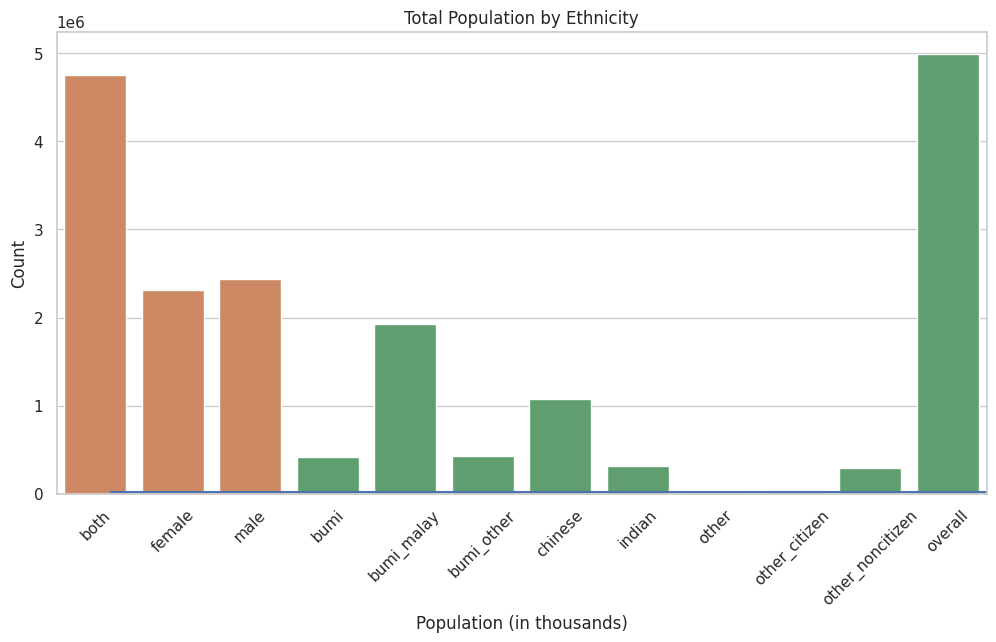

In [5]:
# Population distribution
sns.histplot(df['population'], bins=30, kde=True)
plt.title("Distribution of Population Counts")
plt.xlabel("Population (in thousands)")

# Population by sex
sex_summary = df.groupby('sex')['population'].sum().reset_index()
sns.barplot(x='sex', y='population', data=sex_summary)
plt.title("Total Population by Sex")

# Population by ethnicity
eth_summary = df.groupby('ethnicity')['population'].sum().reset_index()
sns.barplot(x='ethnicity', y='population', data=eth_summary)
plt.title("Total Population by Ethnicity")
plt.xticks(rotation=45)


**6. Bivariate & Multivariate Analysis**

Text(0.5, 1.0, 'Population by Sex Over Time')

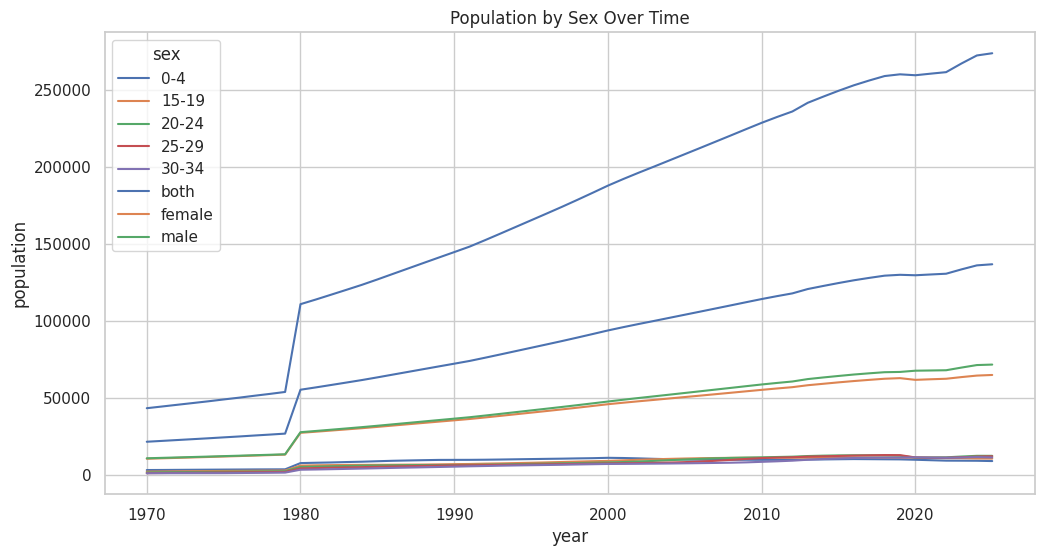

In [6]:
# Yearly population trend
df['year'] = df['date'].dt.year
yearly_pop = df.groupby('year')['population'].sum().reset_index()
sns.lineplot(data=yearly_pop, x='year', y='population')
plt.title("Yearly Total Population Growth in Malaysia")

# Population by age group over time (select major age categories)
age_groups = df[df['age'].isin(['0-4', '15-19', '20-24', '25-29', '30-34'])]
age_year = age_groups.groupby(['year', 'age'])['population'].sum().reset_index()
sns.lineplot(data=age_year, x='year', y='population', hue='age')
plt.title("Population Trends by Age Group")

# Sex comparison over years
sex_year = df.groupby(['year', 'sex'])['population'].sum().reset_index()
sns.lineplot(data=sex_year, x='year', y='population', hue='sex')
plt.title("Population by Sex Over Time")


** 7. Insights & Observations**

## Key Insights
- Malaysia’s total population has steadily increased from 1970 onward.
- The population is fairly evenly split between sexes.
- Some ethnic groups contribute significantly more to total population growth.
- Younger age groups (0–14) show slight declines in recent years, hinting at an aging population trend.


**8. Summary & Future Work**

## Summary
This EDA gave an overview of Malaysia's population dynamics across time, gender, and ethnicity. We've learned how to extract and visualize large-scale structured data using Pandas and Seaborn.

## Learnings
- Importance of parsing dates properly.
- How to group and aggregate population data meaningfully.
- Visualization best practices to summarize and interpret trends.

## Future Work
- Incorporate economic or educational datasets for multivariate comparisons.
- Use predictive models (e.g., time-series forecasting) to forecast future population.
- Explore regional differences if geographic data is added.

## Useful Resources
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Docs](https://seaborn.pydata.org/)
- [Exploratory Data Analysis: A Practical Guide](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
